In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
import statsmodels.api as sm
from datasist.structdata import detect_outliers

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(rc={'figure.figsize': [8, 5]}, font_scale=1.2)
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [3]:
insurance_df = pd.read_csv('datasets/insurance.csv')

In [4]:
print("No. Of records: ",len(insurance_df))

No. Of records:  1338


In [5]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000000,0,yes,southwest,16884.924000000
1,18,male,33.770000000,1,no,southeast,1725.552300000
2,28,male,33.000000000,3,no,southeast,4449.462000000
3,33,male,22.705000000,0,no,northwest,21984.470610000
4,32,male,28.880000000,0,no,northwest,3866.855200000


## Dataset

>https://www.kaggle.com/code/touba7/insurance-prediction-with-five-regressor-models/data

> <b>age:</b> age of primary beneficiary<br>
> <b>sex:</b> insurance contractor gender, female, male<br>
> <b>bmi:</b> Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
> <b>children:</b> Number of children covered by health insurance / Number of dependents<br>
> <b>smoker:</b> Smoking<br>
> <b>region:</b> the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
> <b>charges:</b> Individual medical costs billed by health insurance<br>

## Data Exploration

In [6]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000000,1338.000000000,1338.000000000,1338.000000000
mean,39.207025411,30.663396861,1.094917788,13270.422265141
std,14.049960379,6.098186912,1.205492740,12110.011236694
min,18.000000000,15.960000000,0.000000000,1121.873900000
25%,27.000000000,26.296250000,0.000000000,4740.287150000
50%,39.000000000,30.400000000,1.000000000,9382.033000000
75%,51.000000000,34.693750000,2.000000000,16639.912515000
max,64.000000000,53.130000000,5.000000000,63770.428010000


In [8]:
insurance_df.describe(exclude=[np.number])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Feature Engineering

> Add "Weight status" extracted from BMI<br>
> 50% below 30 bmi and 50% above 30 bmi, max bmi is ((53))

In [10]:
def get_weight_status(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi <= 24.999:
        return 'healthy'
    elif 25.0 <= bmi <= 29.999:
        return 'overweight'
    elif 30.0 <= bmi <= 34.999:
        return 'obese1'
    elif 35.0 <= bmi <= 39.999:
        return 'obese2'
    elif bmi >= 40.0:
        return 'obese3'

insurance_df['weight_status'] = insurance_df['bmi'].apply(get_weight_status)

In [11]:
insurance_df['weight_status'].value_counts()

obese1         391
overweight     386
healthy        225
obese2         225
obese3          91
underweight     20
Name: weight_status, dtype: int64

In [12]:
# Display percentages on countplot charts, handle displaying of chart in case of using "hue"
def display_countplot_percent(df, ax, hue=False):
    '''
    display_countplot_percent(): Add percentages on top of bars plots
    args:
        df: pandas dataframe
        ax: Axes object (Countplot)
        hue: boolean, False by default using in case of ploting with hue
    '''
    df_len = int(len(df))
    for patch in ax.patches:
        patch_height = patch.get_height() if not np.isnan(patch.get_height()) else 0
        percent_txt = '{:.2f}%'.format(100 * patch_height /df_len)
        new_x = patch.get_x() if hue else patch.get_x() + patch.get_width() / 2.7
        new_y = patch_height
        ax.text(new_x, new_y, percent_txt)

## Data Analysis

> ### Univariate Anlaysis
> ### Categorical attributes
> #### sex, smoker, region and weight_status

> ### Sex
> #### What is the percentage of male and female?

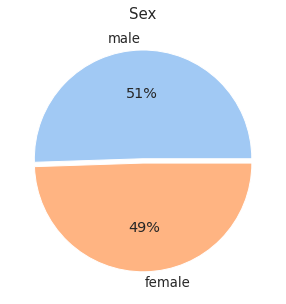

In [13]:
plt.title('Sex', fontsize=15)
explode = [0.02, 0.02]
data = list(insurance_df['sex'].value_counts().values)
labels = list(insurance_df['sex'].value_counts().index)
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=explode);

- No big difference between male and female percentages

> ### Smoker
> #### What is the percentage of smokers?

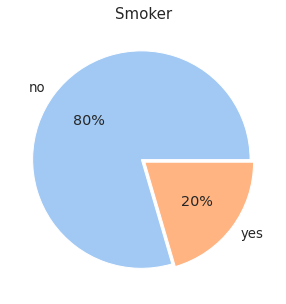

In [14]:
plt.title('Smoker', fontsize=15)
explode = [0.02, 0.02]
data = list(insurance_df['smoker'].value_counts().values)
labels = list(insurance_df['smoker'].value_counts().index)
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=explode);

- Majority of clients are non-smokers 80% 

> ### Region
> #### What is the percentage of each region?
> #### Which region has the highest percentage?

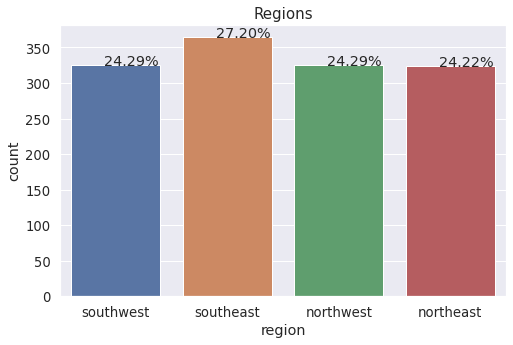

In [15]:
plt.title('Regions', fontsize=15)
ax=sns.countplot(x='region', data=insurance_df)
display_countplot_percent(insurance_df, ax)

- Southeast has the highest percentage 27.2%, increased by 3% from other regions

> ### Weight Status
> #### What is the most frequency weight status?

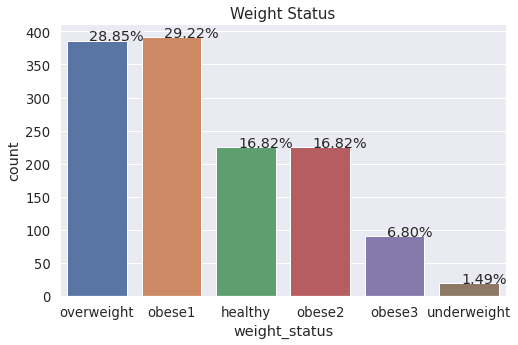

In [16]:
plt.title('Weight Status', fontsize=15)
ax=sns.countplot(x='weight_status', data=insurance_df)
display_countplot_percent(insurance_df, ax)

- "ObeseI" has the highest frequency
- "Underweight" has the lowest frequency
- "ObeseI" and "Overweight" have the most frequency 
- "Healty" and "ObeseII" have relatively same frequency
- 52.47% of clients are Obese

> ### Numeric attributes
> #### Age,	BMI, Children, Charges

> ### Age
>> #### Which range of ages have the most frequency?
>> #### Is age contain outliers?

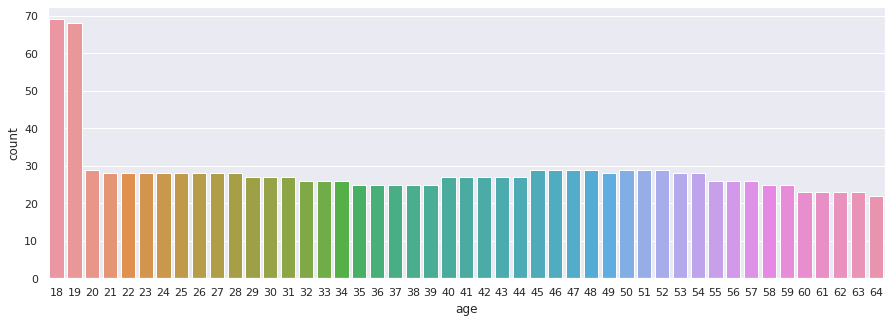

In [17]:
sns.set(rc={'figure.figsize': [15, 5]})
sns.countplot(data=insurance_df, x="age");

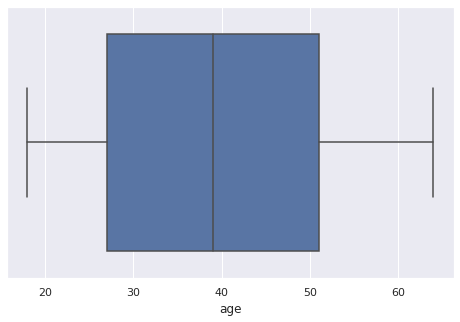

In [18]:
sns.set(rc={'figure.figsize': [8, 5]})
sns.boxplot(insurance_df["age"]);

- There is no outliers in age
- Most frequency are below 20 years

> ### BMI
>> #### Is bmi contain outliers?

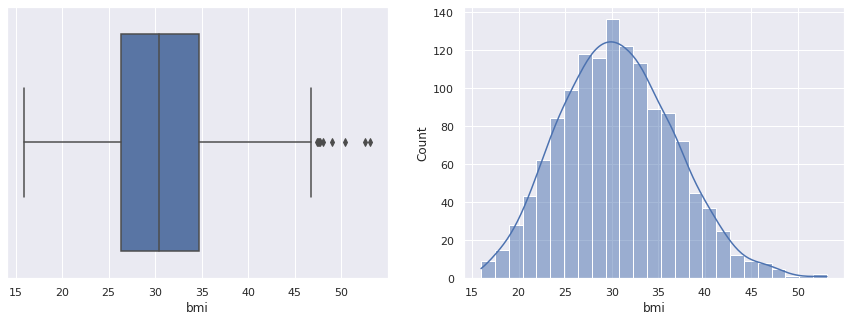

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
sns.boxplot(insurance_df["bmi"], ax=axes[0])
sns.histplot(data=insurance_df, x="bmi", kde=True, ax=axes[1]);

- Normal distribution 
- Has few outliers, mainly above 47
- 50% between 27-35
- Very extreme BMI mainly above 50

In [20]:
insurance_df[insurance_df['bmi'] >= 50]

,age,sex,bmi,children,smoker,region,charges,weight_status
847,23,male,50.380000000,1,no,southeast,2438.055200000,obese3
1047,22,male,52.580000000,1,yes,southeast,44501.398200000,obese3
1317,18,male,53.130000000,0,no,southeast,1163.462700000,obese3


- For the very extreme BMI records still not included extreme charges
- The first 2 records mainly have same data but totally different charges and the only big difference is "Smoking", which means that charges very affected by smoking 

> ### Children
>> #### What is the most frequency number of children?

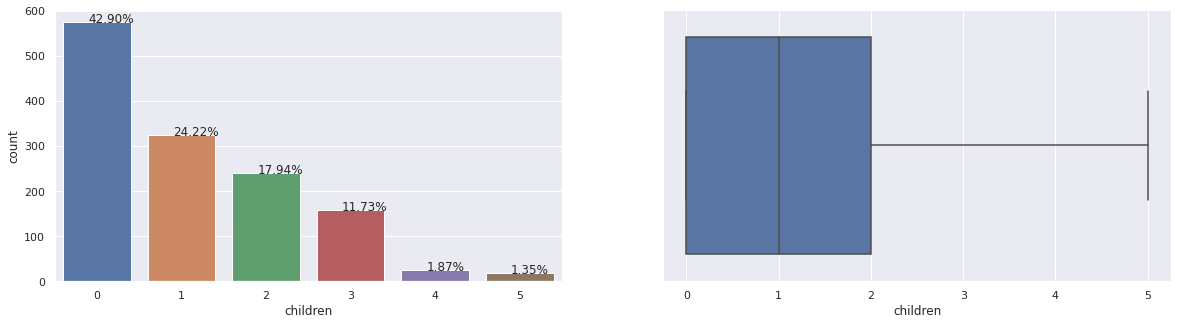

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5)) 
ax=sns.countplot(data=insurance_df, x="children",ax=axes[0])
sns.boxplot(insurance_df["children"], ax=axes[1])
display_countplot_percent(insurance_df, ax)

- 43% of clients donot have children
- 24% of clients have only one child
- 75% of clients have maximun two children
- Five is the max number of children

> ### Charges
>> #### What is the distribution of charges?
>> #### Is there any outliers?
>> #### What is the most frequency range of charges?

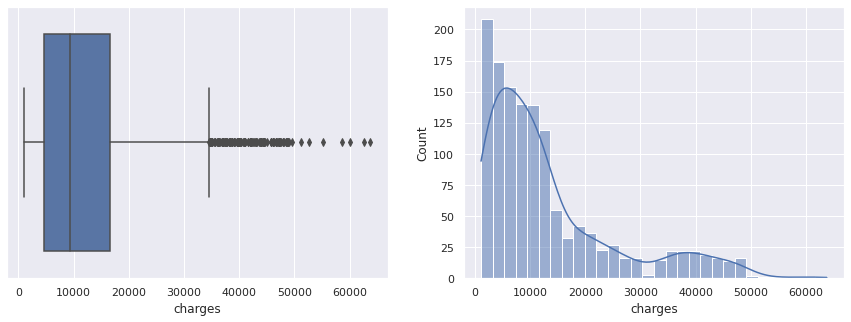

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
sns.boxplot(insurance_df["charges"], ax=axes[0])
sns.histplot(data=insurance_df, x="charges", kde=True, ax=axes[1]);

- Right skewness
- Has many outliers
- 50% below 10000
- 75% below 20000
- Outliers maily above 35000
- Extreme ouliers mainly above 50000, around 7 records

> ### Bivariate and Multivariate Anlaysis

> ##### Is there a relation between gender and weight status?

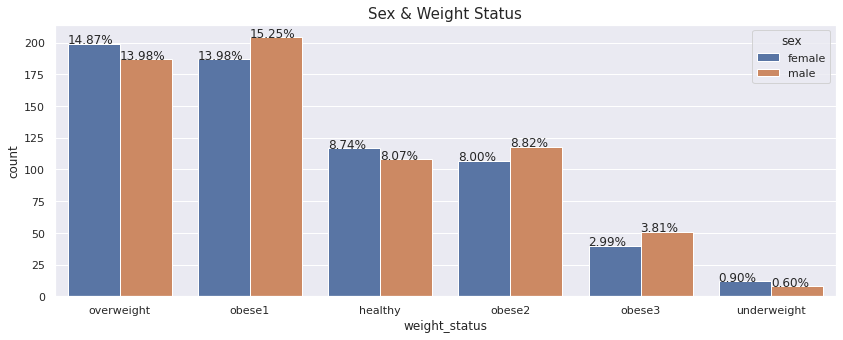

In [23]:
sns.set(rc={'figure.figsize': [14, 5]})
plt.title('Sex & Weight Status', fontsize=15)
ax=sns.countplot(data=insurance_df, x='weight_status', hue='sex')
display_countplot_percent(insurance_df, ax, True)

- Females have higher percentages in 'Underweight' and 'Healthy'
- On the other hand males have higher percentages in all 'Obese' levels
- Males and females have relatively same percentages in "Overweight"

> ##### Is there a relation between smoking and weight status?

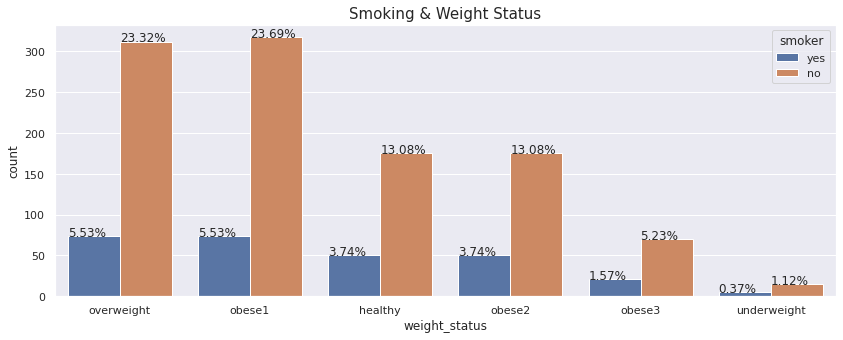

In [24]:
plt.title('Smoking & Weight Status', fontsize=15)
ax=sns.countplot(data=insurance_df, x='weight_status', hue='smoker')
display_countplot_percent(insurance_df, ax, True)

Smoking percentages in each weight status are:
- Overweight  : 19%
- ObeseI      : 18.5%
- Healthy     : 22.5%
- ObeseII     : 22.4%
- ObeseIII    : 23%
- Underweight : 24.8%

- "Under Weights" have the highest smoking percentage 24.8% 

> ##### Is there a relation between age and weight status?

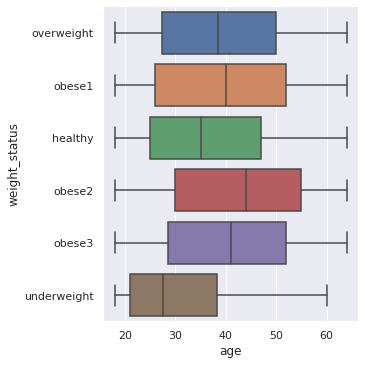

In [25]:
sns.catplot(y="weight_status", x="age", kind="box", data=insurance_df);

- Majority of "underweight" 75% below 40 years old, and maximum age is 60
- Age ranges in both ObeseII and III are the highest

> ##### Relation between all numerical features

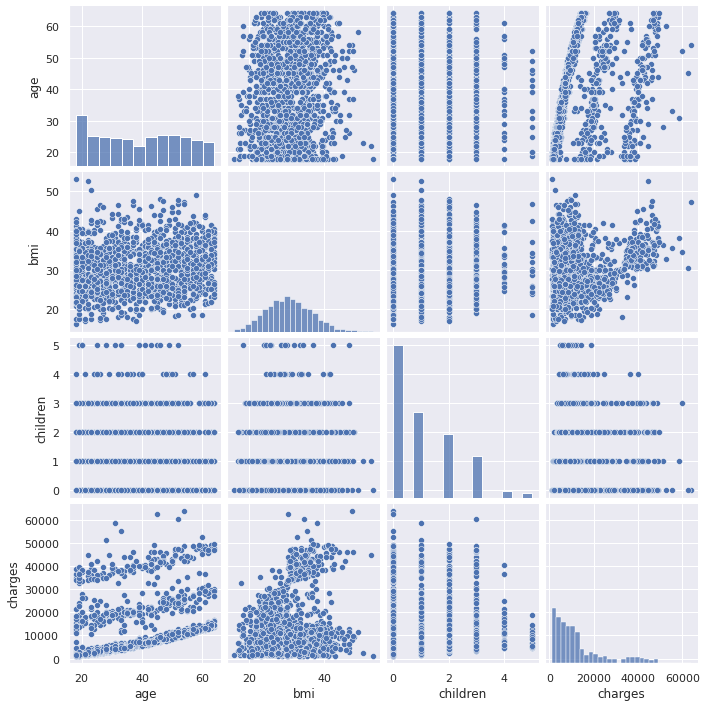

In [26]:
sns.pairplot(insurance_df);

- Highest BMI scores related to clients below thirties
- Clients with 4 and 5 children have lower charges than others

> ##### Is there a relation between smoking and gender?

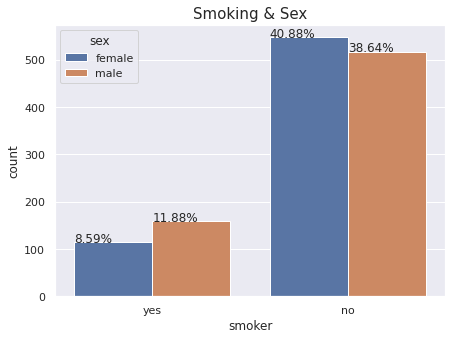

In [27]:
sns.set(rc={'figure.figsize': [7, 5]})
plt.title('Smoking & Sex', fontsize=15)
ax=sns.countplot(data=insurance_df, x='smoker', hue='sex')
display_countplot_percent(insurance_df, ax, True)

- Smoking in males is greater than in females

> #### Relation between "Charges" and categorical features

>> ##### Is there is a relation between smoking and increasing of charges? 

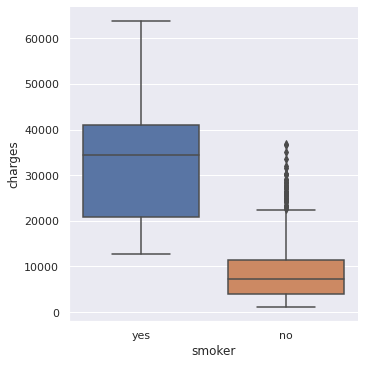

In [28]:
sns.catplot(x="smoker", y="charges", kind="box", data=insurance_df);

- Charges of smoking person higher than non-smoking
- Maximum of non-smoking is near to the first quartile of smoking
- Non-smoking contain many outliers, but still less than the third quartile of smoking 

In [29]:
def get_outliers_data(df , col):
    outliers = detect_outliers(df, 0, [col])
    c_len = len(list(insurance_df.loc[outliers, col]))
    c_min=insurance_df.loc[outliers, col].min()
    c_max=insurance_df.loc[outliers, col].max()
    print('MIN ',c_min,' MAX ',c_max, ' No. Of Outliers ', c_len)

In [30]:
print("Outliers in Charges")
get_outliers_data(insurance_df, 'charges')
print("\nOutliers in Charges ((Non-smoking))")
get_outliers_data(insurance_df[insurance_df['smoker']=='no'], 'charges')

Outliers in Charges
MIN  34617.84065  MAX  63770.42801  No. Of Outliers  139

Outliers in Charges ((Non-smoking))
MIN  22493.65964  MAX  36910.60803  No. Of Outliers  46


>> ##### Is there is a relation between weight status and increasing of charges? 

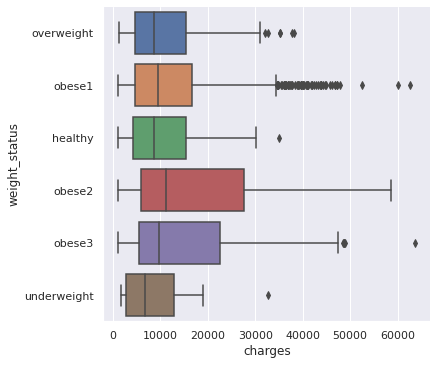

In [31]:
sns.catplot(y="weight_status", x="charges", kind="box", height=5, aspect=1.2, data=insurance_df);

- "underweight" has the lowest charges, below 20000, then "Healthy" below 30000
- "Obese" levels have the higest charges

>> ##### Is there is a relation between gender and increasing of charges? 

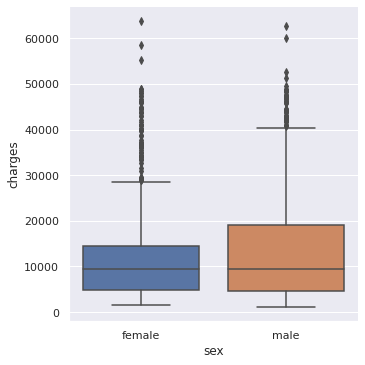

In [32]:
sns.catplot(x="sex", y="charges", kind="box", data=insurance_df);

- Males have higher charges than females, may because of the obesity in males in dataset is greater than females 

>> ##### Which regions have the highest charges?

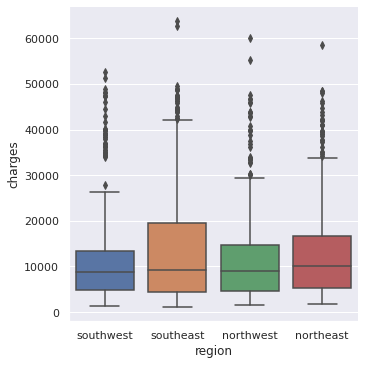

In [33]:
sns.catplot(x="region", y="charges", kind="box", data=insurance_df);

- Southeast region has the highest range of charges, on the other hand southwest region has the lowset ranges 

> #### What is the features of the outliers charges?

In [34]:
get_outliers_data(insurance_df, 'bmi')

MIN  47.41  MAX  53.13  No. Of Outliers  9


In [35]:
print("Outliers in Charges")
get_outliers_data(insurance_df, 'charges')

Outliers in Charges
MIN  34617.84065  MAX  63770.42801  No. Of Outliers  139


In [36]:
outliers = detect_outliers(insurance_df, 0, ['charges'])
charges_lst = list(insurance_df.loc[outliers, 'charges'])
charges_outliers_df = insurance_df[insurance_df['charges'].isin(charges_lst)]
charges_outliers_df.groupby(['smoker', 'weight_status'])['weight_status'].count()

smoker  weight_status
no      obese1            2
        overweight        1
yes     healthy           1
        obese1           61
        obese2           50
        obese3           21
        overweight        3
Name: weight_status, dtype: int64

In [37]:
charges_outliers_df[charges_outliers_df['weight_status'] == 'healthy']

,age,sex,bmi,children,smoker,region,charges,weight_status
917,45,male,22.895000000,0,yes,northeast,35069.374520000,healthy


In [38]:
charges_outliers_df[charges_outliers_df['weight_status'] == 'overweight']

,age,sex,bmi,children,smoker,region,charges,weight_status
242,55,female,26.800000000,1,no,southwest,35160.134570000,overweight
476,24,male,28.500000000,0,yes,northeast,35147.528480000,overweight
524,42,male,26.070000000,1,yes,southeast,38245.593270000,overweight
1303,43,male,27.800000000,0,yes,southwest,37829.724200000,overweight


In [39]:
charges_outliers_df[~charges_outliers_df['weight_status'].isin(['overweight', 'healthy'])]

,age,sex,bmi,children,smoker,region,charges,weight_status
14,27,male,42.130000000,0,yes,southeast,39611.757700000,obese3
19,30,male,35.300000000,0,yes,southwest,36837.467000000,obese2
23,34,female,31.920000000,1,yes,northeast,37701.876800000,obese1
29,31,male,36.300000000,2,yes,southwest,38711.000000000,obese2
30,22,male,35.600000000,0,yes,southwest,35585.576000000,obese2
...,...,...,...,...,...,...,...,...
1291,19,male,34.900000000,0,yes,southwest,34828.654000000,obese1
1300,45,male,30.360000000,0,yes,southeast,62592.873090000,obese1
1301,62,male,30.875000000,3,yes,northwest,46718.163250000,obese1
1313,19,female,34.700000000,2,yes,southwest,36397.576000000,obese1


In [40]:
# === Extreme ouliers above 50000 ===
charges_outliers_df[charges_outliers_df['charges'] >= 50000]

,age,sex,bmi,children,smoker,region,charges,weight_status
34,28,male,36.400000000,1,yes,southwest,51194.559140000,obese2
543,54,female,47.410000000,0,yes,southeast,63770.428010000,obese3
577,31,female,38.095000000,1,yes,northeast,58571.074480000,obese2
819,33,female,35.530000000,0,yes,northwest,55135.402090000,obese2
1146,60,male,32.800000000,0,yes,southwest,52590.829390000,obese1
1230,52,male,34.485000000,3,yes,northwest,60021.398970000,obese1
1300,45,male,30.360000000,0,yes,southeast,62592.873090000,obese1


In [41]:
# === 47.41 is the min number of outliers in BMI ===
charges_outliers_df[(charges_outliers_df['bmi'] >= 47.41)]

,age,sex,bmi,children,smoker,region,charges,weight_status
543,54,female,47.410000000,0,yes,southeast,63770.428010000,obese3
860,37,female,47.600000000,2,yes,southwest,46113.511000000,obese3
1047,22,male,52.580000000,1,yes,southeast,44501.398200000,obese3


In [42]:
charges_outliers_df[charges_outliers_df['charges'] == max(charges_lst)]

,age,sex,bmi,children,smoker,region,charges,weight_status
543,54,female,47.410000000,0,yes,southeast,63770.428010000,obese3


In [43]:
# == 53.130000 is the max BMI number ==
insurance_df[insurance_df['bmi'] == 53.130000]

,age,sex,bmi,children,smoker,region,charges,weight_status
1317,18,male,53.130000000,0,no,southeast,1163.462700000,obese3


- The outliers in charges mainly related to obese smoking clients also with respect to age
- The maximum charges is related to 47.4 BMI which is obeseIII, although the maximum BMI 53.13 has only 1163.4 charges, the difference here is smoking and ages as the second client has only 18 years old and not smoking even he has the highest BMI score
- Maximum amount of charges in outliers which related to healthy and overweight clients is "38245.59327" 

---------------------------------------------------------------------------------------------------------------

## Data Preprocessing 

In [44]:
cp_df=insurance_df.copy()

> ### Duplicated Values

In [45]:
cp_df[cp_df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,weight_status
581,19,male,30.590000000,0,no,northwest,1639.563100000,obese1


In [46]:
cp_df.drop_duplicates(inplace=True)

In [47]:
cp_df[cp_df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,weight_status


> ### Feature Encoding
> ##### Ordinal encoding (smoker, weight_status)

In [48]:
bool_map = {'no':0, 'yes':1}
cp_df['smoker'] = cp_df.smoker.map(bool_map).astype('int')

In [49]:
weight_map = {'underweight':1, 'healthy':2, 'overweight':3, 'obese1':4, 'obese2':5, 'obese3':6}
cp_df['weight_status'] = cp_df.weight_status.map(weight_map).astype('int')

> ##### OneHotEncoding (sex, region) 

In [50]:
categ_lst = ['sex', 'region']
cp_df = pd.get_dummies(cp_df, columns = categ_lst, drop_first=True)

> ### Correlation 

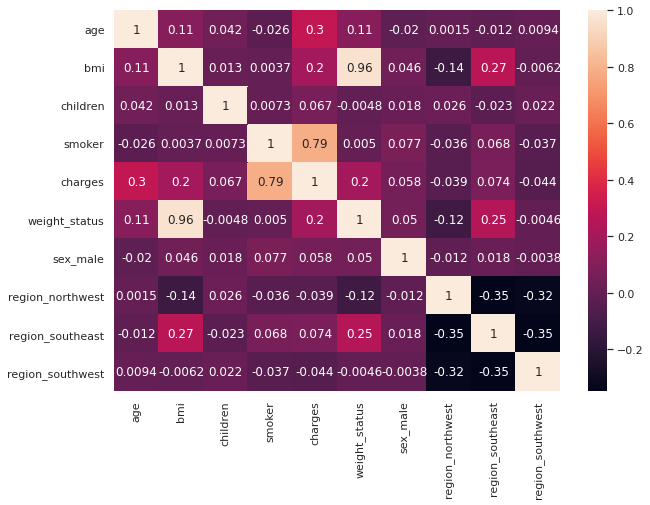

In [51]:
sns.set(rc={'figure.figsize': [10, 7]})
sns.heatmap(cp_df.corr(), annot=True);

In [52]:
# ==== Reset figsize ====
sns.set(rc={'figure.figsize': [8, 5]}, font_scale=1.2)

In [53]:
cp_df.drop(['weight_status'], axis=1, inplace=True)

- There is 0.79 positive correlation between smoker and charges

> ### Spliting Data

In [54]:
cols = list(cp_df.columns)
cols.remove('charges')
target = 'charges'

X = cp_df.loc[:,cols]
y = cp_df.loc[:,target]

> ### Feature Scaling

In [55]:
def scale_features(x_train, x_test):
    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train, x_test

### Building Models

In [56]:
# === display evaluation scores dataframe ===
def get_eval_df(y_test, y_pred, col):
    data = []
    n = len(y_pred)
    k = len(cols)+1
    data.append(metrics.mean_absolute_error(y_test, y_pred))
    data.append(metrics.mean_squared_error(y_test, y_pred))
    data.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    data.append(metrics.r2_score(y_test, y_pred))
    data.append(1 - (1-metrics.r2_score(y_test, y_pred)) * (n-1)/(n-k-1))
    eval_df = pd.DataFrame(data, ['MAE', 'MSE', 'RMSE', 'R^2', 'R^2_adj'], columns=[col])
    return eval_df

# === Ploting regression line between test and prediction ===
def plt_reg(y_test, y_pred):
    plt.figure()
    sns.regplot(x=y_pred, y=y_test).set(title='Regression plot of Testing and Prediction')
    
# === spliting, scaling, fitting, predicting ===
def eval_model(X, y, model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
    x_train, x_test = scale_features(x_train, x_test)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Training R^2 score:  ', model.score(x_train, y_train))
    print('Testing R^2 score:   ', model.score(x_test, y_test))
    return y_test, y_pred, model

# === display coefficients with responding columns for (Linear)===
def get_coefficients_df(model, cols):
    data = list(model.coef_)
    cols_cp = cols.copy()
    data.insert(0, model.intercept_)
    cols_cp.insert(0, 'Intercept')
    coeff_df = pd.DataFrame(data, cols_cp ,columns=['Coefficient'])
    return coeff_df

> ### Linear Regression
>> #### All Dependent Features

Training R^2 score:   0.7299057809339075
Testing R^2 score:    0.8069287081198013


,Linear Regression
MAE,4177.045561036
MSE,35478020.675235577
RMSE,5956.342894364
R^2,0.806928708
R^2_adj,0.800193663


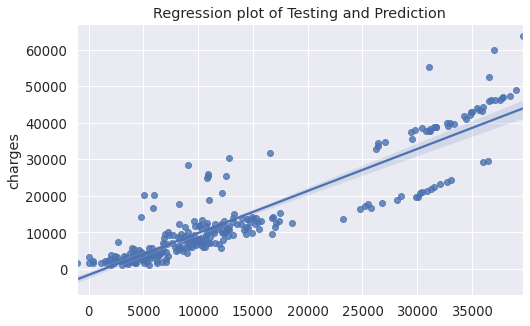

In [57]:
model = LinearRegression()
y_test, y_pred ,model = eval_model(X, y, model)
plt_reg(y_test, y_pred)
eval_df = get_eval_df(y_test, y_pred, 'Linear Regression')
eval_df

- Increasing in testing R^2 score by 7.7% from training

In [58]:
coefficients_df = get_coefficients_df(model, cols)
coefficients_df

,Coefficient
Intercept,13030.203369289
age,3472.975553430
bmi,1927.828251010
children,636.501185298
smoker,9234.342487010
sex_male,-50.749674666
region_northwest,-168.944439430
region_southeast,-371.780809702
region_southwest,-284.610396346


In [59]:
# ==== Get P-values of Dependent Features ====
model = sm.OLS(y, sm.add_constant(X)).fit()
predictions = model.predict(sm.add_constant(X))
model.pvalues

const              0.000000000
age                0.000000000
bmi                0.000000000
children           0.000592543
smoker             0.000000000
sex_male           0.697630286
region_northwest   0.464052694
region_southeast   0.030803535
region_southwest   0.044835563
dtype: float64

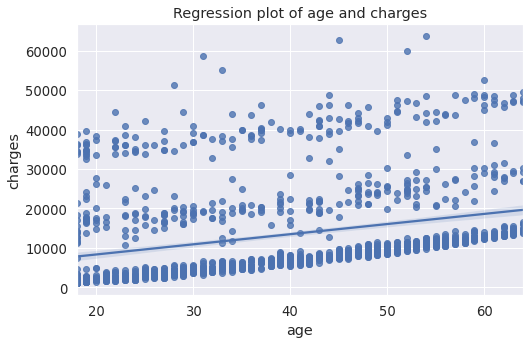

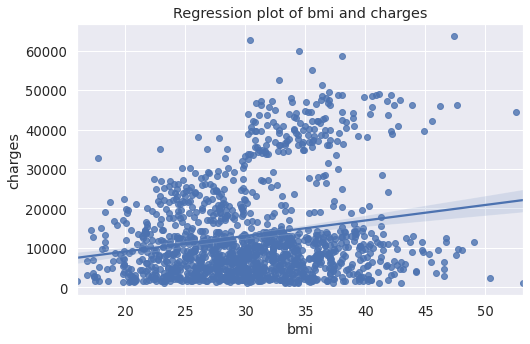

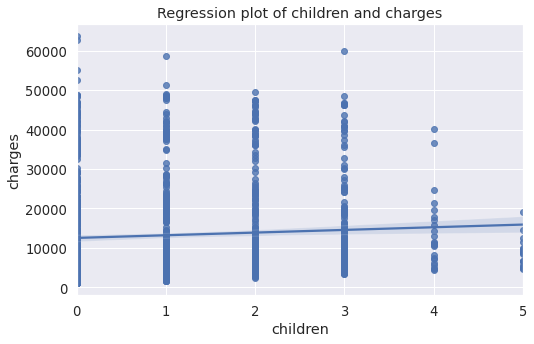

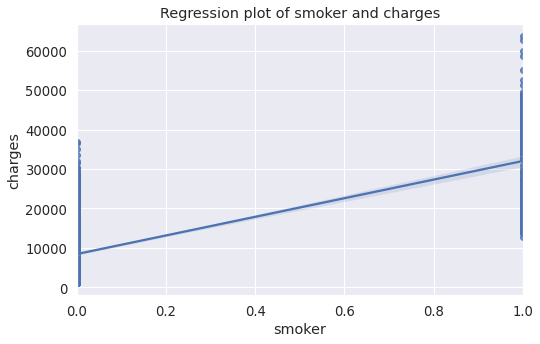

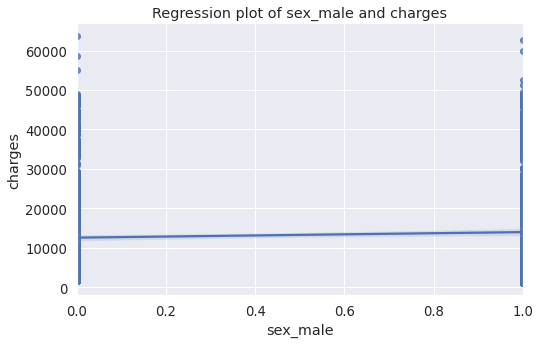

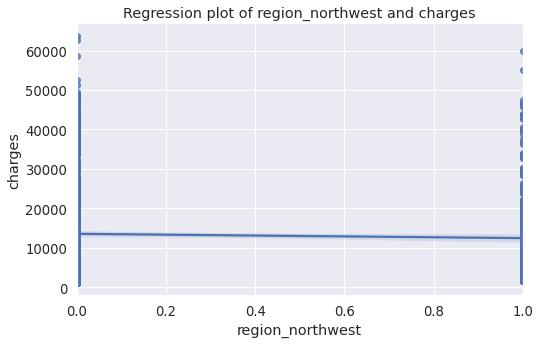

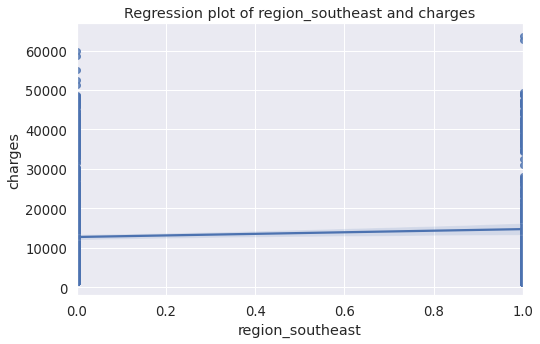

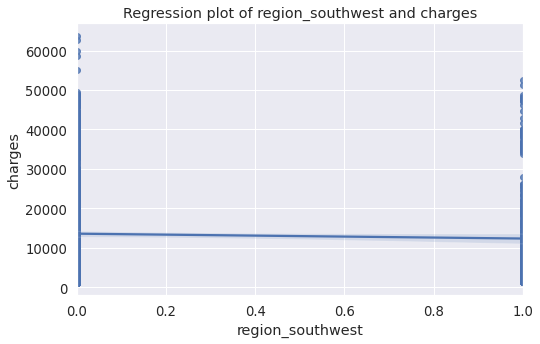

In [60]:
# ==== Ploting between all dependent features and independent feature ===
for var in cols:
    plt.figure()
    sns.regplot(x=var, y=target, data=cp_df).set(title=f'Regression plot of {var} and {target}');

- As shown above both "sex_male" and "region_northwest" are not significant
#### Try removing both "sex_male" and "region_northwest" and check R^2

>> #### Removing "sex_male" and "region_northwest"

Training R^2 score:   0.7297515294520615
Testing R^2 score:    0.8068559302807479


,Linear Regression
MAE,4175.843357182
MSE,35491394.044489466
RMSE,5957.465404389
R^2,0.806855930
R^2_adj,0.800118346


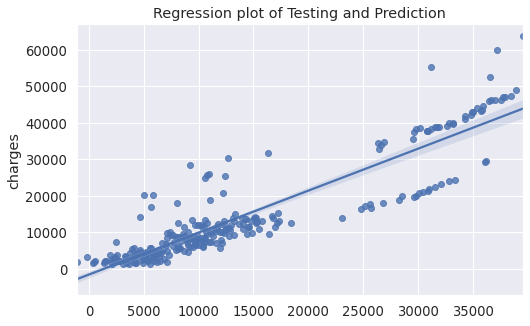

In [61]:
up_cols = ['age', 'smoker', 'bmi', 'children', 'region_southeast', 'region_southwest']
X_up = cp_df.loc[:,up_cols]

model = LinearRegression()
y_test, y_pred ,model = eval_model(X_up, y, model)
plt_reg(y_test, y_pred)
eval_df = get_eval_df(y_test, y_pred, 'Linear Regression')
eval_df

- No difference in R^2 after removing "sex_male" and "region_northwest", so will remove the non-significant features

> ### Polynomial Regression

<!-- >> #### All Dependent Features -->

Training R^2 score:   0.8319247480274501
Testing R^2 score:    0.8857773945751121


,Polynomial Regression
MAE,2827.942732239
MSE,20989096.397396926
RMSE,4581.385859911
R^2,0.885777395
R^2_adj,0.881792885


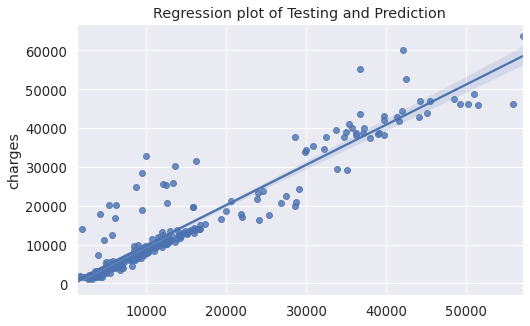

In [62]:
poly = PolynomialFeatures(degree=2)
poly2_X = poly.fit_transform(X_up)
model = LinearRegression()

y_test, y_pred ,model = eval_model(poly2_X, y, model)
plt_reg(y_test, y_pred)
eval_df = get_eval_df(y_test, y_pred, 'Polynomial Regression')
eval_df

- Increasing in testing R^2 score by 4.85% from training
- Both testing and training R^2 scores are better in polynomial than linear regression
- Checking in the below cell R^2 scores after increasing degree of polynomial regression 

Degree ==>>  2
Training R^2 score:   0.8319247480274501
Testing R^2 score:    0.8857773945751121
Degree ==>>  3
Training R^2 score:   0.839342794905531
Testing R^2 score:    0.8824176405504986
Degree ==>>  4
Training R^2 score:   0.8497512495307544
Testing R^2 score:    0.8729640238093852
Degree ==>>  5
Training R^2 score:   0.8673358334762795
Testing R^2 score:    0.4641412552094878


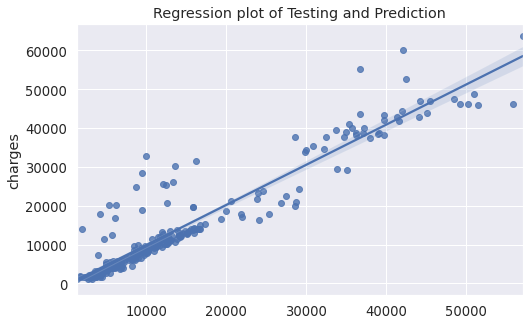

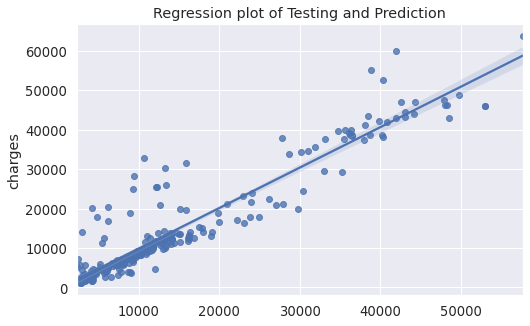

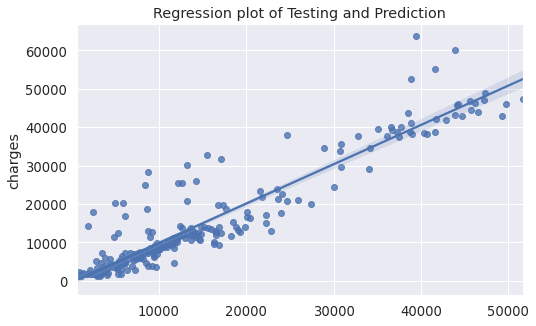

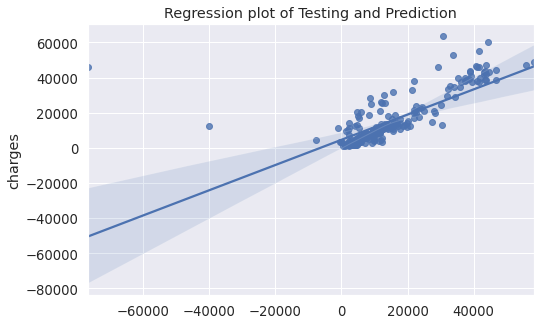

In [63]:
for i in range(2, 6):
    print('Degree ==>> ',i)
    poly = PolynomialFeatures(degree=i)
    poly_X = poly.fit_transform(X_up)
    model = LinearRegression()
    y_test, y_pred ,model = eval_model(poly_X, y, model)
    plt_reg(y_test, y_pred)

- By increasing degree, training R^2 is increased but testing R^2 is decreased till fifth degree which was the worest with highest training R^2 and lowest testing R^2, so overfitting is increased.
- So till now polynomial model with second degree get the best results without overfitting.

> ### Regulization
> #### Linear Regression
>> #### Lasso Regression L1

Training R^2 score:   0.7297514708965919
Testing R^2 score:    0.806814911923112


,Lasso Regression
MAE,4176.027475106
MSE,35498931.416442044
RMSE,5958.097969692
R^2,0.806814912
R^2_adj,0.800075897


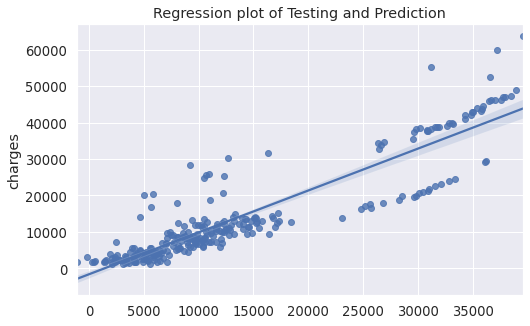

In [64]:
# === Alpha by default equal 1 ===
lasso_model = Lasso()
y_test, y_pred ,model = eval_model(X_up, y, lasso_model)
plt_reg(y_test, y_pred)
eval_df = get_eval_df(y_test, y_pred, 'Lasso Regression')
eval_df

- There is no big difference in R^2 and adjusted one before and after L1 regulization 

In [65]:
coefficients_df = get_coefficients_df(model, up_cols)
coefficients_df

,Coefficient
Intercept,13030.203369289
age,3475.155984040
smoker,9234.388073695
bmi,1919.905475358
children,633.301341791
region_southeast,-278.882726215
region_southwest,-194.720239177


In [66]:
# === change alpha values ===
for i in range(1, 50, 5):
    print('Alpha ==>> ',i)            
    lasso_model = Lasso(alpha=i)
    y_test, y_pred ,model = eval_model(X_up, y, lasso_model)

Alpha ==>>  1
Training R^2 score:   0.7297514708965919
Testing R^2 score:    0.806814911923112
Alpha ==>>  6
Training R^2 score:   0.72974942658222
Testing R^2 score:    0.8066088207323485
Alpha ==>>  11
Training R^2 score:   0.7297445007562826
Testing R^2 score:    0.8064018975399787
Alpha ==>>  16
Training R^2 score:   0.7297366897272566
Testing R^2 score:    0.8061927786710241
Alpha ==>>  21
Training R^2 score:   0.7297259934951419
Testing R^2 score:    0.8059814641254844
Alpha ==>>  26
Training R^2 score:   0.7297124120599388
Testing R^2 score:    0.8057679539033598
Alpha ==>>  31
Training R^2 score:   0.7296959454216467
Testing R^2 score:    0.80555224800465
Alpha ==>>  36
Training R^2 score:   0.7296765935802663
Testing R^2 score:    0.8053343464293554
Alpha ==>>  41
Training R^2 score:   0.7296543565357971
Testing R^2 score:    0.8051142491774756
Alpha ==>>  46
Training R^2 score:   0.7296292342882393
Testing R^2 score:    0.8048919562490109


> #### Linear Regression
>> #### Ridge Regression L2

Training R^2 score:   0.7297508594087865
Testing R^2 score:    0.8066709197467736


,Ridge Regression
MAE,4178.289215095
MSE,35525390.852018714
RMSE,5960.318016014
R^2,0.806670920
R^2_adj,0.799926882


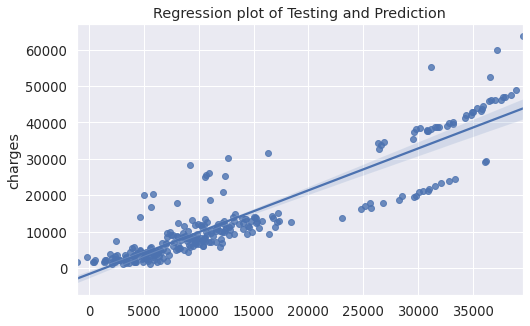

In [67]:
# === Alpha by default equal 1 ===
ridge_model = Ridge()
y_test, y_pred ,model = eval_model(X_up, y, ridge_model)
plt_reg(y_test, y_pred)
eval_df = get_eval_df(y_test, y_pred, 'Ridge Regression')
eval_df

- There is small decreasing in adjusted R^2 after using regulization L2

In [68]:
coefficients_df = get_coefficients_df(model, up_cols)
coefficients_df

,Coefficient
Intercept,13030.203369289
age,3472.619891786
smoker,9226.636385726
bmi,1919.407470814
children,633.964771901
region_southeast,-279.372525438
region_southwest,-195.961737052


In [69]:
# === change alpha values ===
for i in range(1, 40, 5):
    print('Alpha ==>> ',i)        
    ridge_model = Ridge(alpha=i)
    y_test, y_pred ,model = eval_model(X_up, y, ridge_model)    

Alpha ==>>  1
Training R^2 score:   0.7297508594087865
Testing R^2 score:    0.8066709197467736
Alpha ==>>  6
Training R^2 score:   0.7297276437382878
Testing R^2 score:    0.8057342118728834
Alpha ==>>  11
Training R^2 score:   0.7296720277570535
Testing R^2 score:    0.8047785908417915
Alpha ==>>  16
Training R^2 score:   0.7295849549823159
Testing R^2 score:    0.8038047373806225
Alpha ==>>  21
Training R^2 score:   0.7294673410015318
Testing R^2 score:    0.8028133107384497
Alpha ==>>  26
Training R^2 score:   0.7293200744155353
Testing R^2 score:    0.8018049494351827
Alpha ==>>  31
Training R^2 score:   0.7291440177444863
Testing R^2 score:    0.8007802719803337
Alpha ==>>  36
Training R^2 score:   0.7289400082983383
Testing R^2 score:    0.7997398775630815


> #### Polynomial Regression
>> #### Lasso Regression L1

Training R^2 score:   0.831918651967374
Testing R^2 score:    0.8859175116154369


,Lasso Regression
MAE,2822.440154630
MSE,20963349.041561760
RMSE,4578.575001194
R^2,0.885917512
R^2_adj,0.881937890


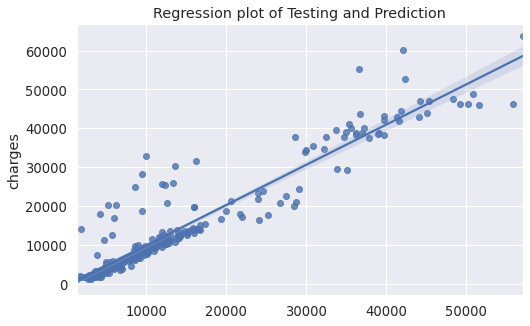

In [70]:
# === Alpha by default equal 1 ===
lasso_model = Lasso()
y_test, y_pred ,model = eval_model(poly2_X, y, lasso_model)
plt_reg(y_test, y_pred)
eval_df = get_eval_df(y_test, y_pred, 'Lasso Regression')
eval_df

In [71]:
# === change alpha values ===
for i in range(1, 20, 2):
    print('Alpha ==>> ',i)    
    lasso_model = Lasso(alpha=i)
    y_test, y_pred ,model = eval_model(poly2_X, y, lasso_model)

Alpha ==>>  1
Training R^2 score:   0.831918651967374
Testing R^2 score:    0.8859175116154369
Alpha ==>>  3
Training R^2 score:   0.8318694589418394
Testing R^2 score:    0.8861653810173105
Alpha ==>>  5
Training R^2 score:   0.831769905848247
Testing R^2 score:    0.8863699670780927
Alpha ==>>  7
Training R^2 score:   0.8316190272734578
Testing R^2 score:    0.8865297671796922
Alpha ==>>  9
Training R^2 score:   0.8314345611196354
Testing R^2 score:    0.8866590652534885
Alpha ==>>  11
Training R^2 score:   0.8312005322249044
Testing R^2 score:    0.8867250090490453
Alpha ==>>  13
Training R^2 score:   0.830925124279748
Testing R^2 score:    0.8867437571043137
Alpha ==>>  15
Training R^2 score:   0.8306198134948051
Testing R^2 score:    0.8867092396401924
Alpha ==>>  17
Training R^2 score:   0.8303834671764143
Testing R^2 score:    0.8865744886750679
Alpha ==>>  19
Training R^2 score:   0.8301422297426406
Testing R^2 score:    0.8864677397869357


> #### Polynomial Regression
>> #### Ridge Regression L2

Training R^2 score:   0.8318205556484576
Testing R^2 score:    0.8860204102033611


,Ridge Regression
MAE,2821.272599221
MSE,20944440.802049424
RMSE,4576.509674637
R^2,0.886020410
R^2_adj,0.882044378


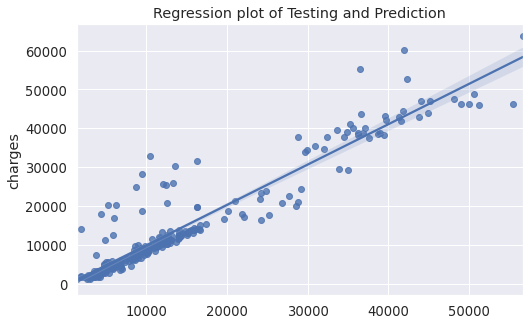

In [72]:
# === Alpha by default equal 1 ===
ridge_model = Ridge()
y_test, y_pred ,model = eval_model(poly2_X, y, ridge_model)
plt_reg(y_test, y_pred)
eval_df = get_eval_df(y_test, y_pred, 'Ridge Regression')
eval_df

In [73]:
# === change alpha values ===
for i in range(1, 10):
    print('Alpha ==>> ',i)
    ridge_model = Ridge(alpha=i)
    y_test, y_pred ,model = eval_model(poly2_X, y, ridge_model)

Alpha ==>>  1
Training R^2 score:   0.8318205556484576
Testing R^2 score:    0.8860204102033611
Alpha ==>>  2
Training R^2 score:   0.831544093132652
Testing R^2 score:    0.8860668771778955
Alpha ==>>  3
Training R^2 score:   0.8311377829374934
Testing R^2 score:    0.8859637260044584
Alpha ==>>  4
Training R^2 score:   0.830632834323286
Testing R^2 score:    0.885745155515979
Alpha ==>>  5
Training R^2 score:   0.8300528317717326
Testing R^2 score:    0.8854368331469572
Alpha ==>>  6
Training R^2 score:   0.8294159419500645
Testing R^2 score:    0.88505844888489
Alpha ==>>  7
Training R^2 score:   0.8287363542161484
Testing R^2 score:    0.8846253588104429
Alpha ==>>  8
Training R^2 score:   0.8280252654404943
Testing R^2 score:    0.8841496919390344
Alpha ==>>  9
Training R^2 score:   0.8272915780996996
Testing R^2 score:    0.8836411234001474


- By increasing alpha the R^2 scores in both training and testing decreasing